In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras import Model,layers,Sequential
import PIL
import pathlib
import cv2
import os

In [2]:
data_path_train = 'DataSets/LionvsTiger/train'
data_path_test = 'DataSets/LionvsTiger/test'

In [3]:
data_train = pathlib.Path(data_path_train)
data_train

WindowsPath('DataSets/LionvsTiger/train')

In [4]:
data_test = pathlib.Path(data_path_test)
data_test

WindowsPath('DataSets/LionvsTiger/test')

In [5]:
train_lion = list(data_train.glob('lion/*.png'))
train_lion

[WindowsPath('DataSets/LionvsTiger/train/lion/0.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/1.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/10.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/100.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/101.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/102.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/103.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/104.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/105.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/106.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/107.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/108.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/109.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/11.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/110.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/111.png'),
 WindowsPath('DataSets/LionvsTiger/train/lion/112.png'),
 WindowsPath('DataSets/LionvsTiger/tr

In [6]:
train_tiger = list(data_train.glob('tiger/*.png'))
train_tiger

[WindowsPath('DataSets/LionvsTiger/train/tiger/0.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/1.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/10.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/100.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/101.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/102.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/103.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/104.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/105.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/106.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/107.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/108.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/109.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/11.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/110.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/111.png'),
 WindowsPath('DataSets/LionvsTiger/train/tiger/112.png'),
 WindowsPath('DataSe

In [7]:
sample = cv2.imread(str(train_tiger))

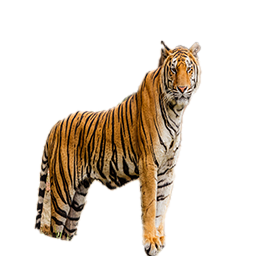

In [8]:
PIL.Image.open(str(train_tiger[0]))

In [9]:
class_data = {
    
    "lion" : list(data_train.glob('lion/*.png')),
    "tiger": list(data_train.glob('tiger/*.png'))
}

In [10]:
class_label = {
    
    "lion" : 0,
    "tiger" : 1
}

In [11]:
X,y = [],[]

for animal_name,images in class_data.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_image = cv2.resize(img,(180,180))
        X.append(resize_image)
        y.append(class_label[animal_name])

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
X_scale = X / 255

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.2)

In [15]:
X_train.shape

(288, 180, 180, 3)

In [16]:
X_test.shape

(72, 180, 180, 3)

In [17]:
CNN = Sequential([
        
#       Data Augmentation
#         keras.layers.experimental.preprocessing.RandomContrast(0.5),
#       cnn
        layers.Conv2D(18,3,activation = 'relu',input_shape = (180,180,3)),
        layers.MaxPooling2D(),
        layers.Conv2D(54,3,activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(102,3,activation = 'relu'),
        layers.MaxPooling2D(),
#       dense  
        layers.Flatten(),
        layers.Dense(20,activation = 'relu'),
        layers.Dense(10,activation = 'relu'),
        layers.Dense(5,activation = 'softmax')
        
])

CNN.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [18]:
CNN.fit(X_train,y_train,epochs = 10)

Epoch 1/10
9/9 [==============================] - 14s 338ms/step - loss: 1.3774 - accuracy: 0.4466
Epoch 2/10
9/9 [==============================] - 3s 343ms/step - loss: 0.8524 - accuracy: 0.5456
Epoch 3/10
9/9 [==============================] - 3s 347ms/step - loss: 0.7234 - accuracy: 0.4852
Epoch 4/10
9/9 [==============================] - 4s 409ms/step - loss: 0.6970 - accuracy: 0.5890
Epoch 5/10
9/9 [==============================] - 4s 404ms/step - loss: 0.6852 - accuracy: 0.5494
Epoch 6/10
9/9 [==============================] - 4s 427ms/step - loss: 0.6635 - accuracy: 0.5798
Epoch 7/10
9/9 [==============================] - 4s 414ms/step - loss: 0.6140 - accuracy: 0.7125
Epoch 8/10
9/9 [==============================] - 4s 398ms/step - loss: 0.5399 - accuracy: 0.7863
Epoch 9/10
9/9 [==============================] - 4s 404ms/step - loss: 0.4726 - accuracy: 0.7577
Epoch 10/10
9/9 [==============================] - 4s 401ms/step - loss: 0.3991 - accuracy: 0.8709


In [19]:
CNN.evaluate(X_test,y_test)
# model is over fitted

3/3 [==============================] - 1s 58ms/step - loss: 0.6129 - accuracy: 0.6944


[0.612899899482727, 0.6944444179534912]